**Mercedes-Benz Greener Manufacturing**

Project 1

DESCRIPTION

Reduce the time a Mercedes-Benz spends on the test bench.

Problem Statement Scenario:

Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

Following actions should be performed:

* If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
* Check for null and unique values for test and train sets.
* Apply label encoder.
* Perform dimensionality reduction.
* Predict your test_df values using XGBoost.




#Import library

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

#Data aquisition

In [ ]:
#read test data
pd_df_test = pd.read_csv('/content/test.csv')
#read train data
pd_df_train = pd.read_csv('/content/train.csv')

In [ ]:
print("Shape {} of train data".format(pd_df_train.shape))
print("Shape {} of test data".format(pd_df_test.shape))

Shape (4209, 378) of train data
Shape (4209, 377) of test data


In [ ]:
#show first 5 records from test data
pd_df_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
#show concise summary of a test data
pd_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB


In [ ]:
#show first 5 records from train data
pd_df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#show concise summary of a train data
pd_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [ ]:
#show descriptive statistic of a train data
pd_df_train.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#show descriptive statistic of a train data, including only string columns
pd_df_train.describe(include=[object])

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,47,27,44,7,4,29,12,25
top,z,aa,as,c,d,w,g,j
freq,360,833,1659,1942,4205,231,1042,277


##Conclusion:
Train and test data have columns that variance equal to zero, see column X11 *descriptive statistic of a train data*.

The unique value of big number of feature are less, data consume more memmory and we have object representation of data, to solve this problem we can encode data.

#Data manipulation

##Encoding data

In [ ]:
#Encode string data
dict_le = {} #create a dictionary to save LabelEncoder object for all string columns
def encodeTrainTestData():
  for col in pd_df_train.columns:#select all feature from data frame
    if (isinstance(pd_df_train[col][0], str)):#check if the column is a string
      if col in pd_df_test.columns:           #check if column from train data is in test data
        #this column is in test data
        #cancatenate data to have all categories
        pd_concat_lcl = pd.concat([pd_df_test[col], pd_df_train[col]])
      else:
        #this column is not in test data
        pd_concat_lcl = pd_df_train[col]
      #encode data for actual column
      le_lcl = LabelEncoder().fit(pd_concat_lcl)
      #save encoded object in dictionare
      dict_le[col] = le_lcl



#transform encoded data
def transformEncodeData(pd_df_data):
  for col in dict_le:#select encoded feature from data frame
    #get encode data for actual column
    le_lcl = dict_le[col]
    #save clustered data for actual column
    pd_df_data[col] = le_lcl.transform(pd_df_data[col])


In [ ]:
#use smaler memmory,
def pd_df_MemorryReduction(pd_df_data):
  for col in pd_df_data.columns:
    if (isinstance(pd_df_data[col][0], np.int64)):#check if fdata type is integer 64 bit
      #use necesary memmory
      if ((pd_df_data[col].max() < 2**7) and (pd_df_data[col].min() >= -2**7)):
        pd_df_data[col] = pd_df_data[col].astype(np.int8)
      elif ((pd_df_data[col].max() < 2**15) and (pd_df_data[col].min() >= -2**15)):
        pd_df_data[col] = pd_df_data[col].astype(np.int16)
      elif ((pd_df_data[col].max() < 2**31) and (pd_df_data[col].min() >= -2**31)):
        pd_df_data[col] = pd_df_data[col].astype(np.int32)
    else:
      pass


In [ ]:
#Encode string data
encodeTrainTestData()
#Transform encode data
transformEncodeData(pd_df_train)
transformEncodeData(pd_df_test)
#memmory reduction
pd_df_MemorryReduction(pd_df_train)
pd_df_MemorryReduction(pd_df_test)

In [ ]:
#show concise summary of a train data
print(pd_df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int16(1), int8(376)
memory usage: 1.5 MB
None


In [ ]:
#show concise summary of a test data
print(pd_df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int16(1), int8(376)
memory usage: 1.5 MB
None


##Remove all columns where variance equal to zero

In [ ]:
#Find columns in train data with variance equal to zero, if number of unique data are 1 variance equal to 0
idx_train_var_0 = np.argwhere(np.array(pd_df_train.nunique()) == 1)

In [ ]:
#Find columns in test data with variance equal to zero, if number of unique data are 1 variance equal to 0
idx_test_var_0 = np.argwhere(np.array(pd_df_test.nunique()) == 1)

In [ ]:
#Find column names of all column where variance equal to zero of train and test data
zero_var_columns_train = np.array(pd_df_train.columns[idx_train_var_0.flatten()])
zero_var_columns_test = np.array(pd_df_test.columns[idx_test_var_0.flatten()])
print('zero_var_columns_train ', zero_var_columns_train)
print('zero_var_columns_test ', zero_var_columns_test)

zero_var_columns_train  ['X11' 'X93' 'X107' 'X233' 'X235' 'X268' 'X289' 'X290' 'X293' 'X297'
 'X330' 'X347']
zero_var_columns_test  ['X257' 'X258' 'X295' 'X296' 'X369']


In [ ]:
#check if is a same column name in both recorded data
np.intersect1d(zero_var_columns_train, zero_var_columns_test)

array([], dtype=object)

In [ ]:
#Find all feature that all records are unique, if frequency of unique value is 1 we do not have calitative date
def findAlluniqReq(pd_df_data):
  lst_all_unique = []
  lst_feature = list(pd_df_data.columns)
  for feature in lst_feature:
    max_count_record = pd_df_data[feature].value_counts().max()
    if (max_count_record == 1):
      lst_all_unique.append(feature)
  return lst_all_unique

In [ ]:
lst_all_unique_train = findAlluniqReq(pd_df_train)
lst_all_unique_test  = findAlluniqReq(pd_df_test)
print('Feature {} with all unique records, train data'.format(lst_all_unique_train))
print('Feature {} with all unique records, test  data'.format(lst_all_unique_test))

Feature ['ID'] with all unique records, train data
Feature ['ID'] with all unique records, test  data


In [ ]:
#drop the feature with zero variance
pd_df_train = pd_df_train.drop(columns=lst_all_unique_train)
pd_df_test  = pd_df_test.drop(columns=lst_all_unique_test)

###Conclusion:
Both record data have columns wit zero variance, but column name is not the same for both record data. Feature **ID** have null variance for all data.

##Find null value in train and test data

In [ ]:
#show number of all number of missing value of train data
pd_df_train.isnull().sum().sum()

0

In [ ]:
#show number of all number of missing value of test data
pd_df_test.isnull().sum().sum()

0

###Conclusion:
In our train and test date are missing null value

##Find corelation data

In [ ]:
#find correlation of all feature with target data
correlation_train_target = pd_df_train.corr()['y'].drop(index='y')

In [ ]:
#separate target data
pd_s_train_target = pd_df_train['y']
pd_df_train = pd_df_train.drop(columns='y')

In [ ]:
#find correlation of all feature
correlation_train = pd_df_train.corr()

In [ ]:
#dictionary clustering of target correlation
dict_corr_feature_target = {}
for i in list([0.1, 0.2, 0.3, 0.4, 0.7, 1.]):
  #initialize the cluster of target correlation
  dict_corr_feature_target[str(int(i * 100))] = []

for corr, feature in zip(correlation_train_target, correlation_train_target.index):
  for i in list([0.1, 0.2, 0.3, 0.4, 0.7, 1.]):
    if (np.absolute(corr) <= i):
      #save feature in correct cluster corelation
      dict_corr_feature_target[str(int(i * 100))].append(feature)
      break

In [ ]:
#show number of feature from all cluster
for key in dict_corr_feature_target:
  print('{1:<3} number of feature from {0}% cluster correlation '.format(key, len(dict_corr_feature_target[key])))

251 number of feature from 10% cluster correlation 
71  number of feature from 20% cluster correlation 
26  number of feature from 30% cluster correlation 
13  number of feature from 40% cluster correlation 
3   number of feature from 70% cluster correlation 
0   number of feature from 100% cluster correlation 


In [ ]:
features_train = np.array(correlation_train.columns)

#Predict

##Split data

In [ ]:
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pd_df_train, pd_s_train_target, random_state= 234)

##Perform dimensionality reduction

###Prediction

In [ ]:
dict_n_components = {}
lst_n_components = [200, 150, 100, 50]
seed = 7

for components_lcl in lst_n_components:
  #Linear dimensionality reduction
  pca = PCA(n_components=components_lcl)
  pca.fit(X_train)
  np_X_train = pca.transform(X_train)
  np_X_test = pca.transform(X_test)
  #save data
  dict_error_pred_train = {}#save error of predicted train data
  dict_error_pred_test = {}#save error of predicted test data
  dict_score_mean = {}#save mean of scores
  dict_score_std = {}#save std of scores
  #Predict score
  for num_trees in range(20, 150, 10):
    kfold = KFold(n_splits=num_trees, random_state=seed, shuffle=True)
    model = XGBRegressor(n_estimators=num_trees, random_state=seed)
    results = cross_val_score(model, np_X_train, y_train, cv=kfold)
    model.fit(np_X_train, y_train)
    dict_error_pred_train[num_trees] = mean_squared_error(y_train, model.predict(np_X_train))#save error of predicted train data
    dict_error_pred_test[num_trees]  = mean_squared_error(y_test,  model.predict(np_X_test)) #save error of predicted test data
    dict_score_mean[num_trees] = results.mean()#save mean of scores
    dict_score_std[num_trees]  = results.std()#save std of scores

  dict_n_components[components_lcl] = {"error_pred_train":dict_error_pred_train,
                                       "error_pred_test":dict_error_pred_test,
                                       "score_mean":dict_score_mean,
                                       "score_std":dict_score_std}


[19:04:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:04:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:04:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:04:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:04:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:04:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:04:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:04:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

###Visualise predicted data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dict_mean_square_error_train = {}
dict_r2_score_train = {}

for key in dict_pred:
  # The mean squared error
  dict_mean_square_error_train[key] =  mean_squared_error(y_train, dict_pred[key])
  # The coefficient of determination: 1 is perfect prediction
  dict_r2_score_train[key] = r2_score(y_train, dict_pred[key])

In [ ]:
dict_mean_square_error_test = {}
dict_r2_score_test = {}

for key in dict_pred_test:
  # The mean squared error
  dict_mean_square_error_test[key] =  mean_squared_error(y_test, dict_pred_test[key])
  # The coefficient of determination: 1 is perfect prediction
  dict_r2_score_test[key] = r2_score(y_test, dict_pred_test[key])

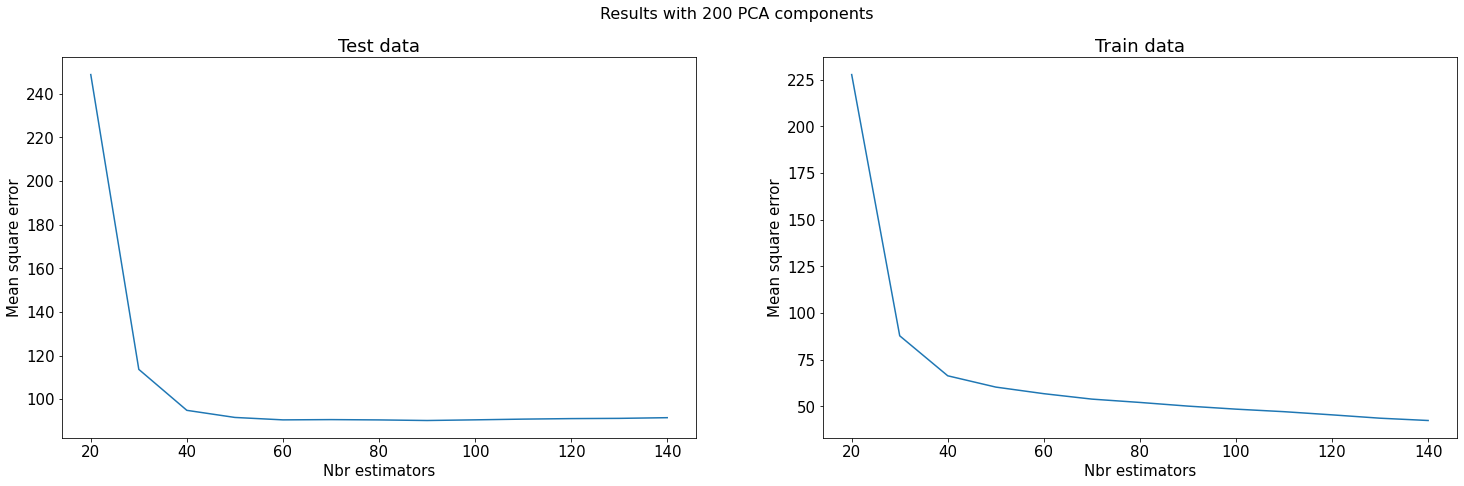

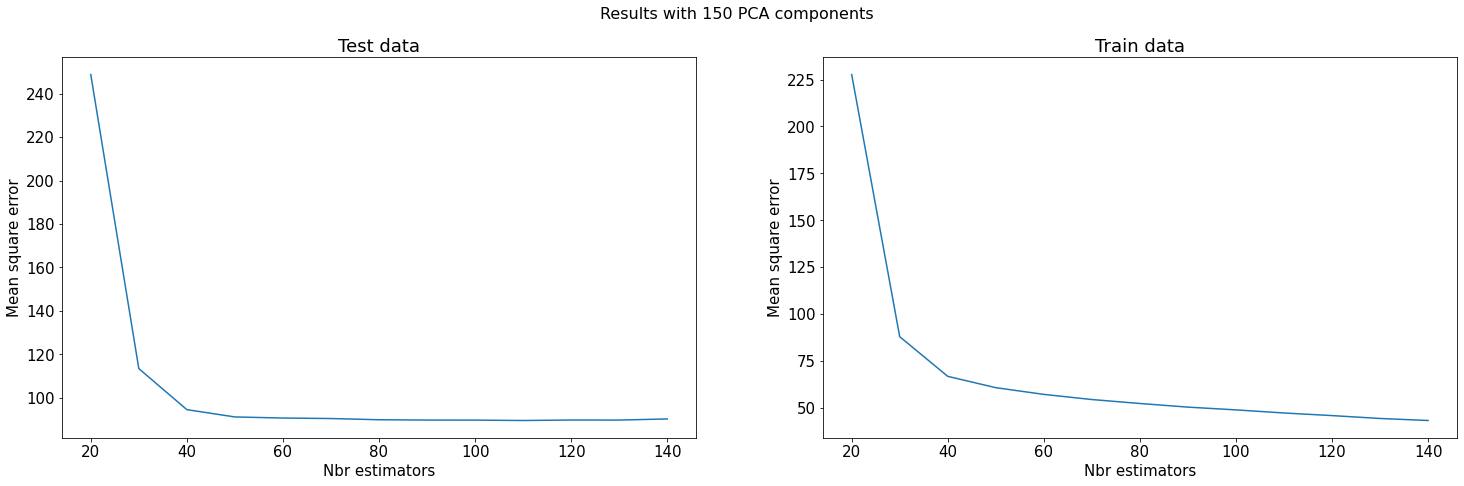

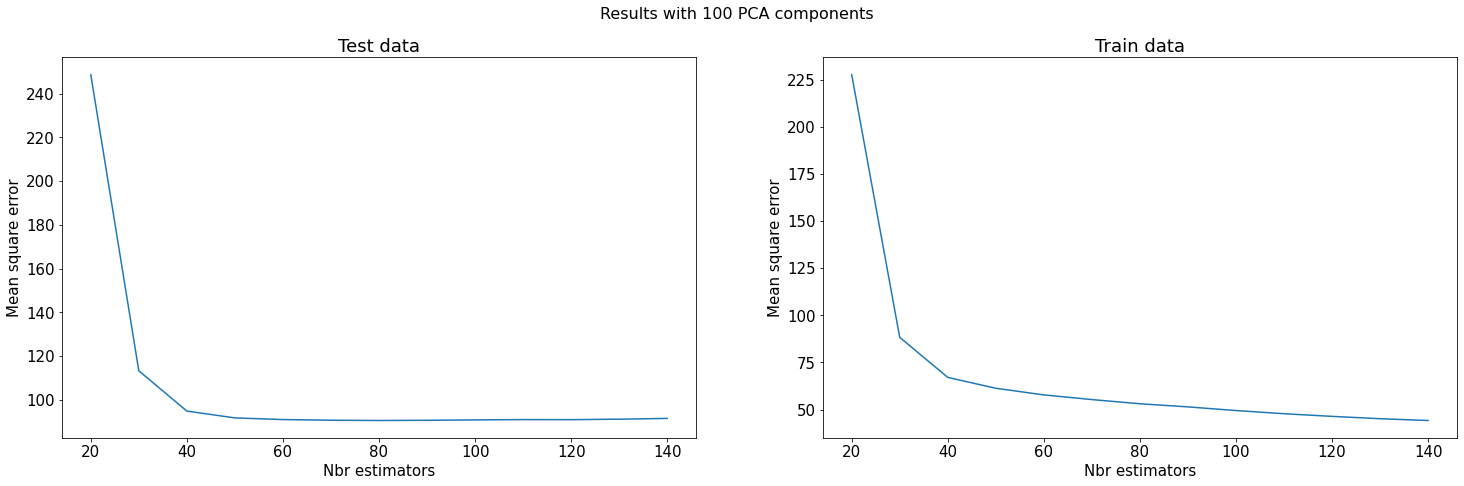

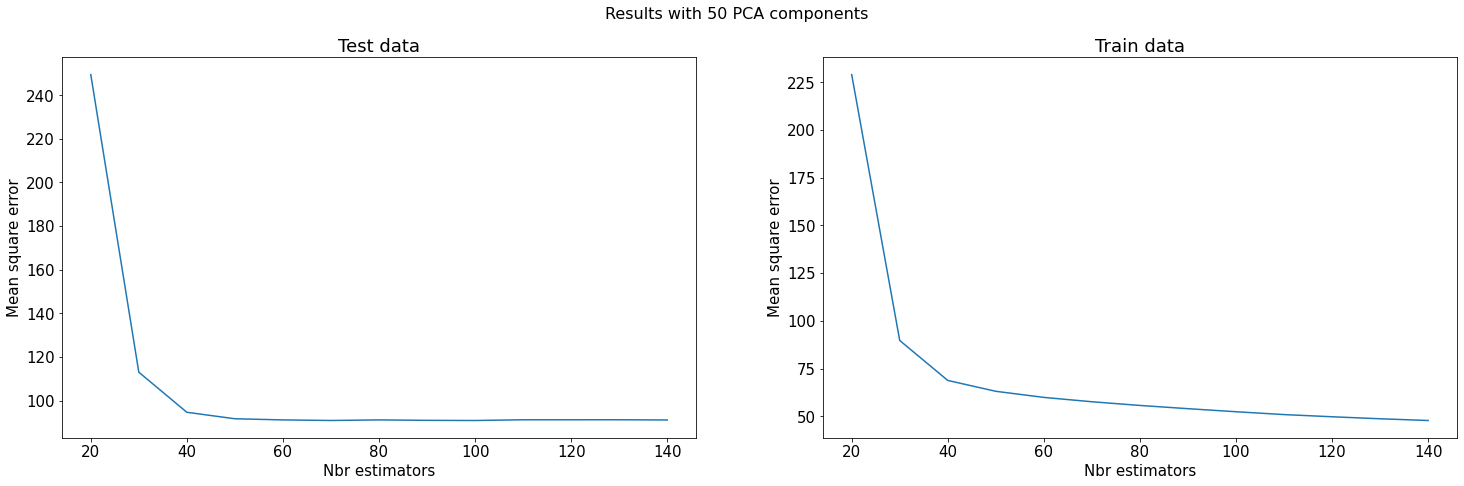

In [ ]:
for components in lst_n_components:
  dict_mean_square_error_test = dict_n_components[components]['error_pred_test']
  dict_mean_square_error_train = dict_n_components[components]['error_pred_train']

  fig, (ax0, ax1) = plt.subplots(1, 2)
  fig.suptitle('Results with {} PCA components'.format(str(components)), fontsize=16)
  plt.rcParams.update({'font.size': 15})
  width, height = 25, 7
  plt.rcParams['figure.figsize'] = [width, height]
  sns.lineplot(data=dict_mean_square_error_test, ax=ax0)
  sns.lineplot(data=dict_mean_square_error_train, ax=ax1)
  ax0.set_title("Test data")
  ax0.set_xlabel('Nbr estimators')
  ax0.set_ylabel('Mean square error')
  ax1.set_title("Train data")
  ax1.set_xlabel('Nbr estimators')
  ax1.set_ylabel('Mean square error')
  plt.show()

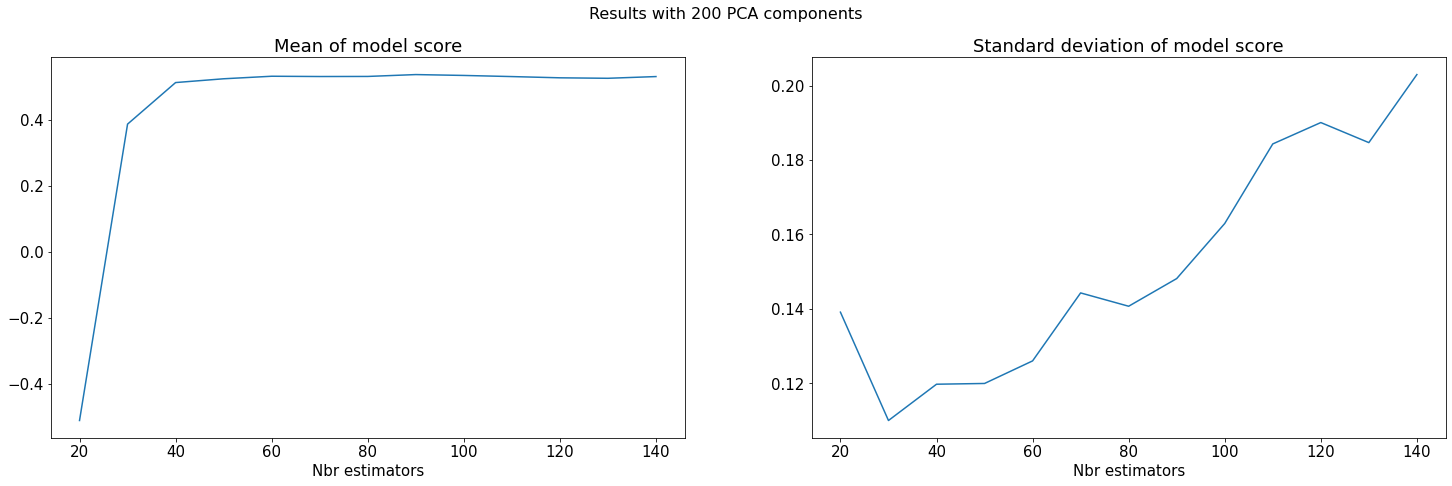

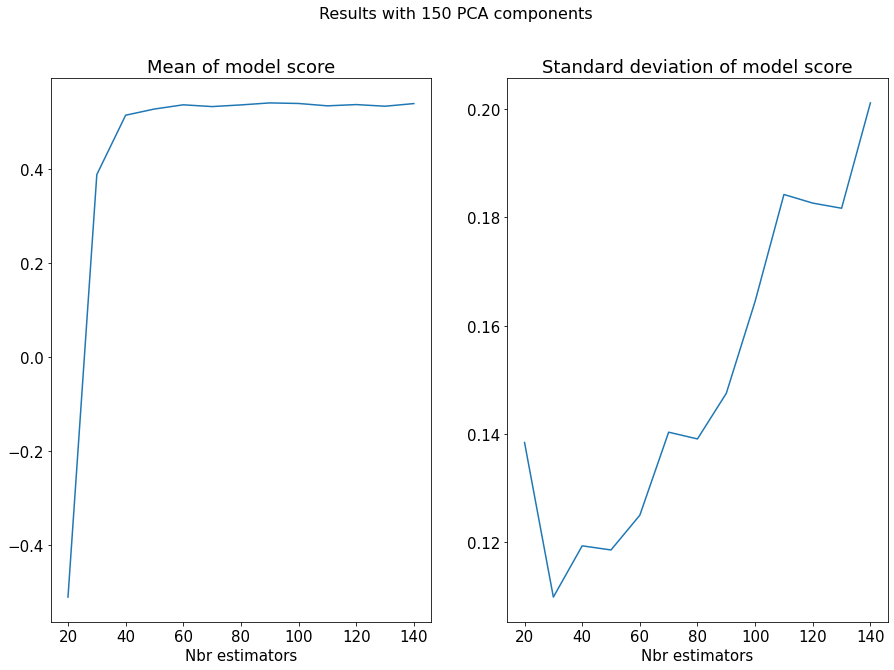

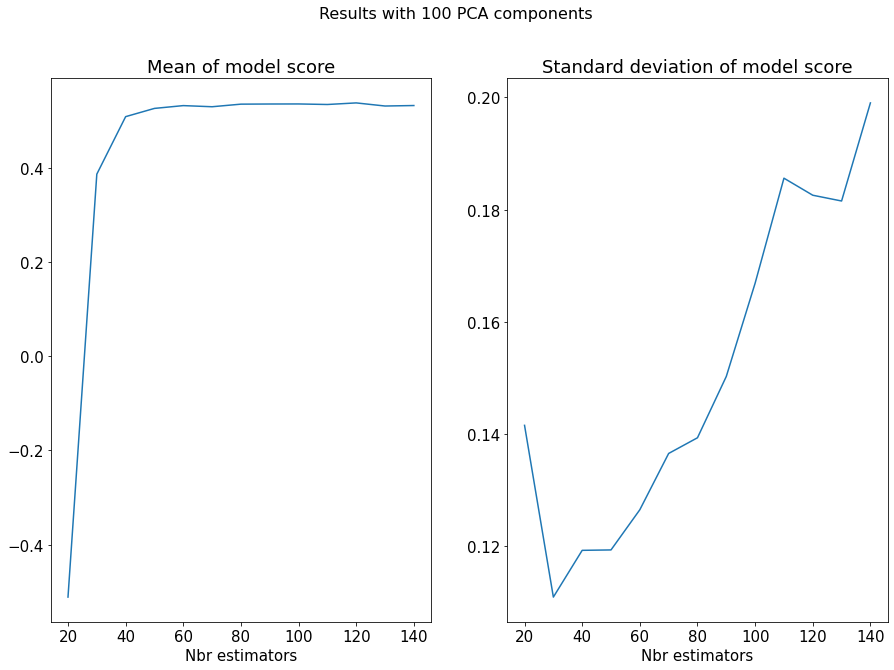

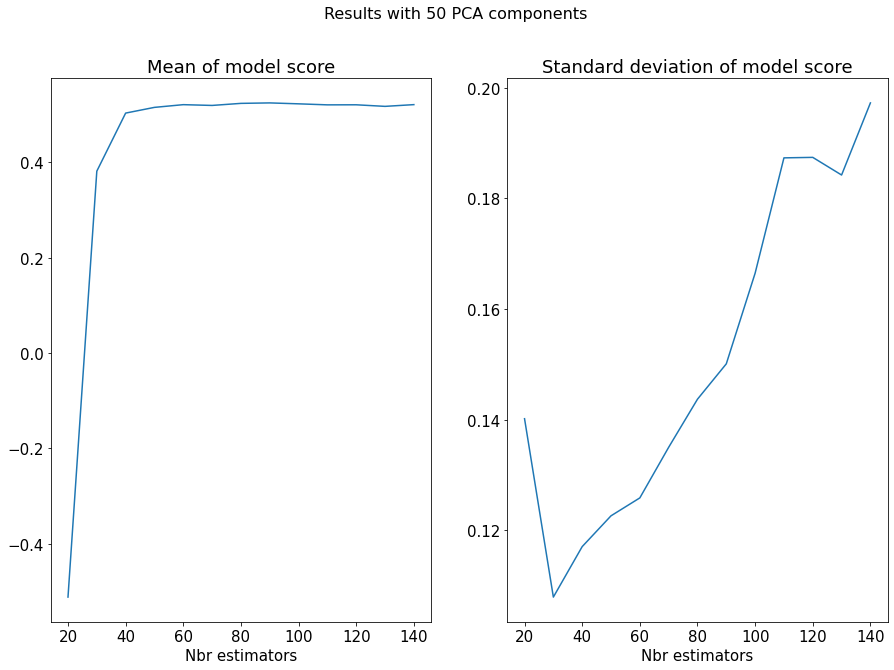

In [ ]:
for components in lst_n_components:
  dict_score_mean = dict_n_components[components]['score_mean']
  dict_score_std = dict_n_components[components]['score_std']

  fig, (ax0, ax1) = plt.subplots(1, 2)
  fig.suptitle('Results with {} PCA components'.format(str(components)), fontsize=16)
  plt.rcParams.update({'font.size': 15})
  width, height = 15, 10
  plt.rcParams['figure.figsize'] = [width, height]
  sns.lineplot(data=dict_score_mean, ax=ax0)
  sns.lineplot(data=dict_score_std, ax=ax1)
  ax0.set_title("Mean of model score")
  ax0.set_xlabel('Nbr estimators')
  ax1.set_title("Standard deviation of model score")
  ax1.set_xlabel('Nbr estimators')
  plt.show()

####Conclusion:
After visualisation our models we can see if we have 200 PCA components and a big number of estimators, our model for testing data is overfiting. A number of 50 PCA components solve the overfiting problem and a big number of estimators is not a problem but after 70 estimators the errors of testing data is not changed, so we can use for predicting data to create a model with 50 PCA components and 70 estimators.

###Predict test data

In [ ]:
seed = 7
components_lcl = 50
#Linear dimensionality reduction
pca = PCA(n_components=components_lcl)
pca.fit(pd_df_train)
np_X_train = pca.transform(pd_df_train)
y_train = pd_s_train_target
#Predict score
num_trees = 70
kfold = KFold(n_splits=num_trees, random_state=seed, shuffle=True)
model = XGBRegressor(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, np_X_train, y_train, cv=kfold)
model.fit(np_X_train, y_train)
print("Mean of scores final test data {}".format(results.mean()))
print("Standard deviation of scores final test data {}".format(results.std()))


[22:25:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:25:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:25:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:25:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:25:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:25:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:25:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:25:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
#Show first 5 records
np_X_test = pca.transform(pd_df_test[:5])
model.predict(np_X_test)

array([ 77.88017,  94.83638,  80.91525,  77.29561, 110.05864],
      dtype=float32)